In [1]:
import pandas as pd
import glob
import numpy as np
import os
from collections import Counter

In [2]:
metadata_df = pd.read_csv("./metadata.csv",index_col=0)



In [3]:
city ='Austin'
city_data = metadata_df[metadata_df['city'] == city]
city_homes = city_data.index.values.astype('int')


In [4]:
city_homes[:5]

array([2836, 2743, 5323, 8560, 3313])

In [5]:
homes_present = glob.glob("/Users/nipun/wiki-15min-2018-download/*.csv")

In [6]:
homes_present = [int(x.split("/")[-1][:-4]) for x in homes_present]

In [7]:
valid_homes = np.intersect1d(homes_present, city_homes)
valid_homes[:5]

array([22, 26, 48, 59, 68])

In [8]:
len(valid_homes)

600

In [12]:
year = 2014
c = Counter()
for home in valid_homes[:]:
    print(home)
    try:
        df = pd.read_csv(os.path.join("/Users/nipun/wiki-15min-2018-download/", "{}.csv".format(home)))
        df = df.drop(['Unnamed: 0', "dataid"], axis=1)
        df.index = pd.to_datetime(df.local_15min)
        df = df.drop("local_15min", axis=1)
        df = df.drop('grid', axis=1)
        c.update(df['{}'.format(year)].mean().dropna().index)
    except:
        print("Data not present for {}".format(home))

22
26
48
59
68
77
86
93
94
101
114
115
121
130
135
160
171
187
222
243
252
267
297
330
Data not present for 330
347
364
370
379
Data not present for 379
410
434
436
457
470
483
Data not present for 483
484
491
499
503
507
508
545
555
573
Data not present for 573
575
Data not present for 575
580
585
621
Data not present for 621
624
645
661
668
739
744
765
772
781
796
861
871
878
890
898
900
Data not present for 900
930
Data not present for 930
936
946
954
974
980
991
Data not present for 991
994
1037
1069
1086
1103
1105
1153
1169
1185
1192
1202
1283
1310
1314
1331
1334
1354
Data not present for 1354
1403
1415
1463
1464
1479
1500
1507
1508
1551
1577
1586
1589
1597
Data not present for 1597
1601
1617
1632
1642
1681
1697
1700
1714
1718
1782
1790
1791
1792
1796
1800
1801
1832
Data not present for 1832
1845
Data not present for 1845
1854
1889
1947
1953
1994
2004
2018
2034
2062
Data not present for 2062
2072
2075
2094
2129
2156
2158
2171
2199
2204
Data not present for 2204
2207
2233
2242
2247

In [13]:
appliances_summarise = pd.Series(c).sort_values(ascending=False).drop("gen").head(20)
appliances_summarise

use               541
air1              459
furnace1          419
refrigerator1     397
dishwasher1       365
kitchenapp1       291
clotheswasher1    265
microwave1        264
drye1             249
kitchenapp2       211
disposal1         206
range1            166
lights_plugs1     144
livingroom1       136
oven1             135
bathroom1         133
bedroom1          104
waterheater1      100
car1               82
lights_plugs2      70
dtype: int64

In [11]:
appliances_summarise = pd.Series(c).sort_values(ascending=False).drop("gen").head(20)
appliances_summarise

use               364
air1              337
furnace1          255
refrigerator1     237
drye1             209
dishwasher1       208
clotheswasher1    199
microwave1        175
kitchenapp1       164
oven1             124
kitchenapp2       120
disposal1         113
lights_plugs1     106
bathroom1          90
car1               81
range1             75
bedroom1           73
livingroom1        70
lights_plugs2      55
air2               54
dtype: int64

In [14]:
year = 2014
means = {}
for home in valid_homes[:]:
    print(home)
    try:
        df = pd.read_csv(os.path.join("/Users/nipun/wiki-15min-2018-download/", "{}.csv".format(home)))
        df = df.drop(['Unnamed: 0', "dataid"], axis=1)
        df.index = pd.to_datetime(df.local_15min)
        df = df.drop("local_15min", axis=1)
        df = df.drop('grid', axis=1)
        means[home] = df['{}'.format(year)][appliances_summarise].mean()
    except:
        print("Data not present for {}".format(home))

22
Data not present for 22
26
Data not present for 26
48
Data not present for 48
59
Data not present for 59
68
Data not present for 68
77
Data not present for 77
86
Data not present for 86
93
Data not present for 93
94
Data not present for 94
101
Data not present for 101
114
Data not present for 114
115
Data not present for 115
121
Data not present for 121
130
Data not present for 130
135
Data not present for 135
160
Data not present for 160
171
Data not present for 171
187
Data not present for 187
222
Data not present for 222
243
Data not present for 243
252
Data not present for 252
267
Data not present for 267
297
Data not present for 297
330
Data not present for 330
347
Data not present for 347
364
Data not present for 364
370
Data not present for 370
379
Data not present for 379
410
Data not present for 410
434
Data not present for 434
436
Data not present for 436
457
Data not present for 457
470
Data not present for 470
483
Data not present for 483
484
Data not present for 484
491

Data not present for 4342
4352
Data not present for 4352
4357
Data not present for 4357
4373
Data not present for 4373
4375
Data not present for 4375
4383
Data not present for 4383
4416
Data not present for 4416
4438
Data not present for 4438
4447
Data not present for 4447
4473
Data not present for 4473
4505
Data not present for 4505
4514
Data not present for 4514
4526
Data not present for 4526
4544
Data not present for 4544
4575
Data not present for 4575
4590
Data not present for 4590
4633
Data not present for 4633
4641
Data not present for 4641
4660
Data not present for 4660
4674
Data not present for 4674
4732
Data not present for 4732
4767
Data not present for 4767
4776
Data not present for 4776
4800
Data not present for 4800
4856
Data not present for 4856
4864
Data not present for 4864
4874
Data not present for 4874
4910
Data not present for 4910
4922
Data not present for 4922
4927
Data not present for 4927
4946
Data not present for 4946
4957
Data not present for 4957
4967
Data not

Data not present for 9195
9201
Data not present for 9201
9215
Data not present for 9215
9233
Data not present for 9233
9235
Data not present for 9235
9237
Data not present for 9237
9248
Data not present for 9248
9251
Data not present for 9251
9277
Data not present for 9277
9278
Data not present for 9278
9295
Data not present for 9295
9333
Data not present for 9333
9340
Data not present for 9340
9343
Data not present for 9343
9356
Data not present for 9356
9434
Data not present for 9434
9451
Data not present for 9451
9484
Data not present for 9484
9498
Data not present for 9498
9499
Data not present for 9499
9509
Data not present for 9509
9578
Data not present for 9578
9609
Data not present for 9609
9610
Data not present for 9610
9613
Data not present for 9613
9624
Data not present for 9624
9631
Data not present for 9631
9642
Data not present for 9642
9643
Data not present for 9643
9647
Data not present for 9647
9654
Data not present for 9654
9670
Data not present for 9670
9674
Data not

In [17]:
mdf = pd.DataFrame(means)
mdf

""


In [89]:
mdf = pd.DataFrame(means)
mdf.div(mdf.loc['use']).mean(axis=1).drop('use').sort_values(ascending=False)*100

air1              26.933539
waterheater1      17.904217
car1              16.608754
furnace1          12.170307
livingroom1       10.424730
refrigerator1      8.060398
drye1              5.980945
lights_plugs2      5.661410
lights_plugs1      5.556391
bedroom1           4.308182
range1             4.132079
oven1              1.708938
bathroom1          1.665699
microwave1         1.310161
kitchenapp1        1.219427
kitchenapp2        1.084703
dishwasher1        1.083919
clotheswasher1     0.588261
disposal1          0.041730
dtype: float64

In [61]:
%matplotlib inline

In [91]:
st = pd.HDFStore("/Users/nipun/15min.h5",mode='w')

In [101]:
year = 2015
means = {}
for home in valid_homes[:]:
    print(home)
    try:
        df = pd.read_csv(os.path.join("/Users/nipun/wiki-15min-2018-download/", "{}.csv".format(home)))
        df = df.drop(['Unnamed: 0', "dataid"], axis=1)
        df.index = pd.to_datetime(df.local_15min)
        df = df.drop("local_15min", axis=1)
        df = df.drop('grid', axis=1)
        st.put(str(home), df['{}'.format(year)][appliances_summarise])
    except Exception as e:
        print("Data not present for {}".format(home))
        print(e)

22


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '22'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


26


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '26'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


48
Data not present for 48


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '59'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


'2015'
59
68


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '68'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


77


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '77'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


86


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '86'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


93


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '93'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


94


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '94'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


101


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '101'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


114


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '114'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


115


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '115'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


121


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '121'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


130


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '130'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


135


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '135'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


160


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '160'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


171


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '171'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


187


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '187'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


222


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '222'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


243


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '243'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


252


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '252'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


267


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '267'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


297


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '297'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


330
Data not present for 330
'2015'
347


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '347'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


364


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '364'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


370


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '370'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


379


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '379'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


410


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '410'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


434


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '434'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


436


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '436'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


457


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '457'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


470


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '470'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


483


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '483'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


484


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '484'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


491


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '491'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


499


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '499'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


503


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '503'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


507


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '507'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


508


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '508'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


545


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '545'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


555
Data not present for 555
'2015'
573
575


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '573'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '575'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


580


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '580'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


585


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '585'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


621
Data not present for 621
'2015'
624


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '624'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


645


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '645'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


661


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '661'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


668


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '668'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


739


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '739'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


744


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '744'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


765
Data not present for 765
'2015'
772


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '772'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


781


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '781'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


796


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '796'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


861


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '861'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


871


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '871'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


878


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '878'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


890


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '890'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


898


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '898'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


900
Data not present for 900
'2015'
930
Data not present for 930
'2015'
936


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '936'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


946


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '946'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


954


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '954'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


974


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '974'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


980


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '980'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


991
Data not present for 991
'2015'
994


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '994'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1037


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1037'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1069


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1069'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1086


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1086'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1103


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1103'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1105


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1105'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1153


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1153'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1169


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1169'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1185


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1185'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1192


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1202


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1202'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1283


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1283'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1310


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1310'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1314


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1314'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1331
Data not present for 1331
'2015'
1334


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1334'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1354
Data not present for 1354
'2015'
1403


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1403'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1415


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1415'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1463


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1463'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1464
Data not present for 1464
'2015'
1479


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1479'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1500


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1500'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1507


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1507'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1508


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1508'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1551


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1551'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1577


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1577'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1586


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1586'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1589


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1589'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1597'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1597
1601
Data not present for 1601
'2015'
1617


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1617'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1632


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1632'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1642


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1642'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1681


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1681'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1697


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1697'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1700


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1700'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1714


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1714'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1718


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1718'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1782
Data not present for 1782
'2015'
1790


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1790'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1791


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1791'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1792


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1792'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1796


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1796'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1800


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1801


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1801'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1832'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1832
1845
Data not present for 1845
'2015'
1854


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1854'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1889


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1889'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1947


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1947'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1953


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1953'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


1994


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1994'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2004


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2004'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2018


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2018'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2034


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2034'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2062
Data not present for 2062
'2015'
2072


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2072'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2075


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2075'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2094


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2094'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2129


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2129'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2156


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2156'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2158


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2158'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2171


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2171'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2199


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2199'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2204
Data not present for 2204
'2015'
2207


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2207'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2233


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2233'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2242


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2242'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2247
Data not present for 2247
'2015'
2335


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2335'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2337


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2337'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2360
Data not present for 2360
'2015'
2361


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2361'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2365


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2365'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2366


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2366'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2378


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2378'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2401


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2401'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2449


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2449'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2458'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2458
2461


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2461'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2465


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2465'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2470


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2470'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2472


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2472'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2505
Data not present for 2505
'2015'
2510


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2510'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2520


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2520'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2532


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2532'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2557


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2557'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2575


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2575'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2638


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2638'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2641


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2641'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2667


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2667'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2742


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2742'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2750
Data not present for 2750
'2015'
2751


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2751'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2755


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2755'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2769


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2769'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2787


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2787'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2814


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2814'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2815
Data not present for 2815
'2015'
2818


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2818'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2829


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2829'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2845


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2845'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2859


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2859'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2864


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2864'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2873
Data not present for 2873
'2015'
2907


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2907'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2925


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2925'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2945


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2945'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2953


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2953'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2965


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2965'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2974


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2974'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2980


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2980'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2986


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2986'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2992


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2992'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


2995
Data not present for 2995
'2015'
3009


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3009'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3032
Data not present for 3032
'2015'
3036


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3036'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3039


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3039'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3044


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3044'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3126


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3126'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3134


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3134'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3143
Data not present for 3143
'2015'
3160
Data not present for 3160
'2015'
3192


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3215
Data not present for 3215
'2015'
3224


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3224'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3235
Data not present for 3235
'2015'
3268


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3268'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3273


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3273'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3299


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3299'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3310


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3310'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3367


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3367'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3392


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3392'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3401


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3401'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3411


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3411'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3413


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3413'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3425


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3425'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3426
Data not present for 3426
'2015'
3443


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3443'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3456


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3456'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3482


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3482'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3484


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3484'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3500


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3500'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3504
Data not present for 3504
'2015'
3506


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3506'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3510


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3510'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3519


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3519'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3527


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3527'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3531


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3531'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3538


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3538'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3544


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3544'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3577


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3577'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3631


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3631'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3632
Data not present for 3632
'2015'
3635


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3635'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3649


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3649'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3652


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3652'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3676'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3676
3678


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3678'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3719


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3719'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3721


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3721'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3723


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3723'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3736


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3736'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3778


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3778'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3789
Data not present for 3789
'2015'
3806
Data not present for 3806
'2015'
3829


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3829'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3831


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3831'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3849


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3849'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3873


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3873'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3883
Data not present for 3883
'2015'
3886


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3886'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3893


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3893'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3916


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3916'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3918


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3918'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3935


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3935'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3964
Data not present for 3964
'2015'
3967


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3967'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


3973
Data not present for 3973
'2015'
4000
Data not present for 4000
'2015'
4022


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4022'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4031


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4031'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4042


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4042'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4053


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4053'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4135


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4135'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4154


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4154'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4193


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4193'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4213


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4213'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4220


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4220'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4224


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4224'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4251
Data not present for 4251
'2015'
4296


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4296'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4297


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4297'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4298


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4298'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4302


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4302'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4321
Data not present for 4321
'2015'
4336


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4336'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4342


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4342'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4352


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4352'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4357


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4357'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4373


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4373'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4375


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4375'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4383
Data not present for 4383
'2015'
4416


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4416'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4438


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4438'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4447


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4447'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4473


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4473'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4505


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4505'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4514


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4514'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4526


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4526'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4544
Data not present for 4544
'2015'
4575


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4575'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4590


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4590'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4633


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4633'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4641


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4641'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4660


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4660'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4674'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4674


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4732'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4732
4767


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4767'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4776


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4776'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4800


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4856


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4856'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4864


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4864'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4874


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4874'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4910


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4910'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4922


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4922'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4927
Data not present for 4927
'2015'
4946


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4946'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4957


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4957'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


4967
Data not present for 4967
'2015'
4998


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4998'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5026


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5026'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5035


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5035'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5060


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5060'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5087


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5087'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5109


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5109'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5129


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5129'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5164
Data not present for 5164
'2015'
5209


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5209'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5218


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5218'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5226
Data not present for 5226
'2015'
5246


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5246'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5252


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5252'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5275


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5275'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5279


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5279'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5298
Data not present for 5298
'2015'
5317


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5317'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5356


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5356'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5357


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5357'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5371


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5371'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5395


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5395'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5403


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5403'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5438
Data not present for 5438
'2015'
5439


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5439'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5450


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5450'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5456


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5456'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5539


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5539'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5545


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5545'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5552


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5552'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5568


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5568'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5615


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5615'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5658


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5658'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5673


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5673'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5677


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5677'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5718


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5718'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5728
Data not present for 5728
'2015'
5738


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5738'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5746


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5746'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5749


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5749'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5759
Data not present for 5759
'2015'
5778


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5778'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5784


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5784'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5785


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5785'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5786


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5786'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5796


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5796'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5809


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5809'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5810


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5810'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5814


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5814'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5817


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5817'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5874


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5874'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5889


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5889'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5892


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5892'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5921


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5921'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5944


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5944'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5949


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5949'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5959


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5959'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5972


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '5972'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


5994


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6012'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Data not present for 5994
'2015'
6012
6061


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6061'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6063


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6063'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6072


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6072'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6078


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6078'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6101


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6101'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6108


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6108'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6121


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6121'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6125


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6125'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6139


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6139'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6165


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6165'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6248


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6248'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6266


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6266'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6286


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6286'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6324'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6324
6334


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6334'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6348


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6348'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6412


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6412'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6418'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6418
6423


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6423'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6460


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6460'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6498


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6498'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6500


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6500'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6536


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6536'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6545
Data not present for 6545
'2015'
6578


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6578'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6614


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6614'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6636


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6636'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6643


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6643'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6673


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6673'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6688


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6688'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6691


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6691'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6692


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6692'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6730


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6730'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6799


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6799'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6826
Data not present for 6826
'2015'
6836


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6836'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6871


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6871'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6910


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6910'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6911


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6911'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6941


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6941'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


6979
Data not present for 6979
'2015'
6990


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6990'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7013
Data not present for 7013
'2015'
7016


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7016'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7017


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7017'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7024


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7024'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7030


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7030'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7036'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7036
7057


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7057'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7108


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7108'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7117


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7117'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7122


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7122'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7240
Data not present for 7240
'2015'
7276


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7276'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7287


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7287'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7319


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7319'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7361


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7361'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7390


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7390'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7408
Data not present for 7408
'2015'
7429


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7429'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7436


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7436'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7468


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7468'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7491


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7491'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7504


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7504'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7510


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7510'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7512


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7512'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7527


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7527'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7531


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7531'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7536


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7536'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7549


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7549'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7560


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7560'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7585


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7585'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7587
Data not present for 7587
'2015'
7597
Data not present for 7597
'2015'
7627


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7627'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7638


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7638'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7641


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7641'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7680


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7680'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7693


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7693'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7703


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7703'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7719


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7719'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7731


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7731'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7739


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7739'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7741


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7741'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7764


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7764'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7767


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7767'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7769


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7769'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7787


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7787'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7788


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7788'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7792
Data not present for 7792
'2015'
7793


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7793'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7794


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7794'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7800


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7850


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7850'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7863


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7863'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7866


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7866'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7875


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7875'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7881
Data not present for 7881
'2015'
7893


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7893'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7900


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7900'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7901


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7901'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7940


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7940'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7951


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7951'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7965


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7965'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7973


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7973'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7982
Data not present for 7982
'2015'
7984


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7984'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


7989


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7989'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8029


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8029'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8031


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8031'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8034


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8034'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8046


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8046'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8047
Data not present for 8047
'2015'
8059


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8059'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8071
Data not present for 8071
'2015'
8079


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8079'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8084


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8084'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8086


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8086'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8092


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8092'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8117
Data not present for 8117
'2015'
8122


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8122'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8142


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8142'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8155


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8155'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8156


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8156'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8163


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8163'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8183


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8183'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8188


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8188'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8197


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8197'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8198
Data not present for 8198
'2015'
8236


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8236'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8243


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8243'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8282


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8282'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8292


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8292'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8317


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8317'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8328
Data not present for 8328
'2015'
8386


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8386'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8419


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8419'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8467


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8467'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8565


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8565'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8589


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8589'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8597
Data not present for 8597
'2015'
8600


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8600'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8626


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8626'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8645


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8645'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8669


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8669'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8730
Data not present for 8730
'2015'
8736
Data not present for 8736
'2015'
8741


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8741'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8767


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8767'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8807


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8807'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8829


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8829'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8847


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8847'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8848


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8848'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8852
Data not present for 8852
'2015'
8857


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8857'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8872
Data not present for 8872
'2015'
8890


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8890'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8942


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8942'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8956


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8956'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8961
Data not present for 8961
'2015'
8967


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8967'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


8986
Data not present for 8986
'2015'
8995


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8995'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9001


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9001'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9019


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9019'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9052


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9052'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9121


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9121'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9134


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9134'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9139
Data not present for 9139
'2015'
9141


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9141'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9160


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9160'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9165
Data not present for 9165
'2015'
9182


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9182'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9195


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9195'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9201


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9201'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9215


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9215'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9233
Data not present for 9233
'2015'
9235


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9235'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9237
Data not present for 9237
'2015'
9248


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9248'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9251


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9251'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9277
Data not present for 9277
'2015'
9278


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9278'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9295


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9295'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9333


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9333'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9340


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9340'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9343


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9343'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9356


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9356'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9434


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9434'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9451
Data not present for 9451
'2015'
9484


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9484'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9498


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9498'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9499
Data not present for 9499
'2015'
9509
Data not present for 9509
'2015'
9578


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9578'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9609


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9609'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9610
Data not present for 9610
'2015'
9613


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9613'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9624


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9624'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9631


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9631'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9642
Data not present for 9642
'2015'
9643


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9643'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9647


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9647'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9654


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9654'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9670'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9670
9674


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9674'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9701


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9701'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9729


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9729'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9737


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9737'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9745


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9745'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9766


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9766'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9771


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9771'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9773'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9773
9803


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9803'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9830
Data not present for 9830
'2015'
9846
Data not present for 9846
'2015'
9875


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9875'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9912


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9912'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9915


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9915'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9919


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9919'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9921


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9921'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9922


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9922'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9923
Data not present for 9923
'2015'
9926


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9926'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9929


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9929'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9931


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9931'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9932


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9932'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9933


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9933'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9934


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9934'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9935


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9935'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9936
Data not present for 9936
'2015'
9937


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9937'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9938


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9938'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9939


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9939'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9942


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9942'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9971


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9971'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9981'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


9981
9982


/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9982'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


In [102]:
st.close()

In [103]:
st = pd.HDFStore("/Users/nipun/15min.h5",mode='r')

In [187]:
es = []
g= Counter()
homes_full_year = []
for count, home in enumerate(st.keys()):
    d = st[home].resample("1D").mean().index
    g.update(d.dayofyear)
    if len(d)==365:
        if len(st[home].drop_duplicates().asfreq("15T", method='pad'))==35040:
            homes_full_year.append(home)
    es.append(pd.Series(np.ones(len(d))+count, index=d))

In [188]:
homes_full_year

['/101',
 '/1086',
 '/114',
 '/115',
 '/1169',
 '/1192',
 '/1202',
 '/1310',
 '/1314',
 '/1403',
 '/1415',
 '/1463',
 '/1500',
 '/1507',
 '/1551',
 '/1589',
 '/160',
 '/1617',
 '/1632',
 '/1642',
 '/1681',
 '/1697',
 '/1700',
 '/1714',
 '/1718',
 '/1790',
 '/1791',
 '/187',
 '/1947',
 '/1953',
 '/2004',
 '/2018',
 '/2034',
 '/2094',
 '/2129',
 '/2156',
 '/2158',
 '/2171',
 '/2199',
 '/222',
 '/2233',
 '/2242',
 '/2361',
 '/2365',
 '/2378',
 '/2401',
 '/2461',
 '/2470',
 '/2472',
 '/2510',
 '/252',
 '/2532',
 '/2557',
 '/2575',
 '/26',
 '/2641',
 '/2755',
 '/2769',
 '/2787',
 '/2814',
 '/2818',
 '/2829',
 '/2859',
 '/2945',
 '/2953',
 '/2965',
 '/2986',
 '/3036',
 '/3039',
 '/3044',
 '/3134',
 '/3192',
 '/3310',
 '/3367',
 '/3392',
 '/3413',
 '/3456',
 '/3482',
 '/3500',
 '/3506',
 '/3527',
 '/3538',
 '/3577',
 '/3635',
 '/3649',
 '/370',
 '/3719',
 '/3723',
 '/3736',
 '/3778',
 '/3829',
 '/3831',
 '/3849',
 '/3893',
 '/3916',
 '/3935',
 '/3967',
 '/4031',
 '/4154',
 '/4213',
 '/4220',


In [191]:
st_full = pd.HDFStore("/Users/nipun/15min-full-year.h5",mode='w')
for home in homes_full_year:
    st_full[home] = st[home]
    

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '101'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1086'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '114'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalName

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '1953'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2004'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2018'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2818'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2829'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '2859'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3829'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3831'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '3849'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4874'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4946'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '4957'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6061'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6063'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '6101'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7024'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7117'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '7361'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8188'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8197'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '8236'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9613'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9647'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/Users/nipun/anaconda3/lib/python3.6/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '9654'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNa

In [192]:
st_full.close()

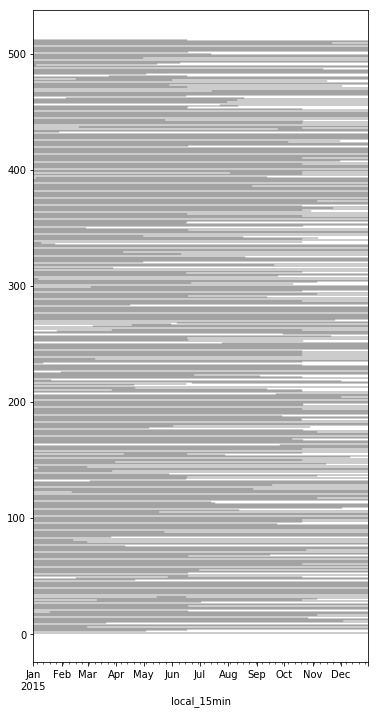

In [126]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 12))
for k in range(512):
    es[k].plot(ax=ax, color='k', linewidth = 0.4)

In [193]:
st_full = pd.HDFStore("/Users/nipun/15min-full-year.h5",mode='r')

In [195]:
len(homes_full_year)

272

In [196]:
out_array = np.empty((len(homes_full_year), 20, 35040))

In [197]:
out_array[:]=np.nan

In [201]:
array_home_index = np.zeros(271)
appliance_index = st_full['/9982'].columns
time_dim = st_full['/9982'].index
for home_number, home in enumerate(st_full.keys()[:]):
    h = int(home[1:])
    array_home_index[home_number] = h
    out_array[home_number,:, :] = st_full[home].drop_duplicates().asfreq("15T",method='pad').T.values
    


In [205]:
np.save('15min-full.npy',out_array)

In [208]:
np.save('15min-homename.npy', array_home_index)
np.save('15min-appliances.npy', appliances_summarise.values)

In [207]:
appliances_summarise

Index(['use', 'air1', 'furnace1', 'refrigerator1', 'dishwasher1',
       'kitchenapp1', 'drye1', 'clotheswasher1', 'microwave1', 'kitchenapp2',
       'disposal1', 'range1', 'oven1', 'lights_plugs1', 'livingroom1',
       'bathroom1', 'bedroom1', 'waterheater1', 'car1', 'lights_plugs2'],
      dtype='object')

In [180]:
st_full.close()

In [174]:
f = st_full[home].drop_duplicates().resample("15T").mean()
f

,use,air1,furnace1,refrigerator1,dishwasher1,kitchenapp1,drye1,clotheswasher1,microwave1,kitchenapp2,disposal1,range1,oven1,lights_plugs1,livingroom1,bathroom1,bedroom1,waterheater1,car1,lights_plugs2
local_15min,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.215000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:15:00,0.525133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00,0.237667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:45:00,0.344933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.214400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:15:00,0.387933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:30:00,0.351733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:45:00,0.256667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.268267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
365*96

35040